# Distribution of the confirmation times

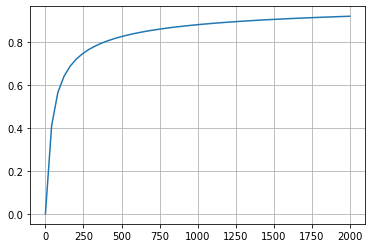

In [23]:
from scipy.stats import invgauss
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, ax = plt.subplots()
ax.grid(True)

# Initial Position in the mempool (in blocks, in this case 5*3000 = 150000 transactions ahead of the one analyzed)
y = 5

# Arrival rate of transactions with an high fee density
c = 0.9

# Diffusion correction (NOTE: the calculation of this value still has to be implemented, currently the example provided in the paper is used)
correction = 0.33 # c = 0.9 -> 0.33, c = 0.95 -> 0.35, c = 0.25 -> 0.5

mean = (y + correction) / (1 - c)
shape = (y + correction)**2

num_blocks_plot = 2000

x = np.linspace(0,num_blocks_plot)
plt.plot(x,invgauss.cdf(x, mean, scale=shape))
plt.show() 



# Survival Function and trend of zombie channels / locked funds over time

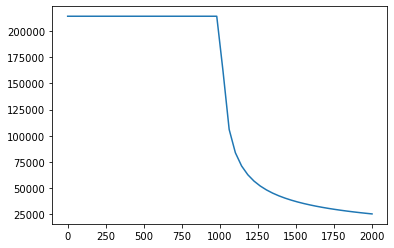

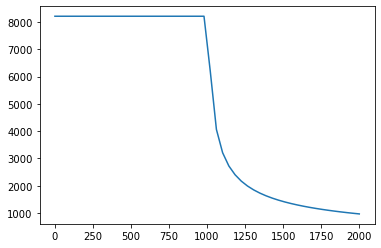

In [25]:
initial_num_zombie_channels = 428400 / 2
initial_locked_BTC = 16422/2

def f(x, mu, shape, INIT_VALUE):
    if x >= 0 and x <= 1000:
        return INIT_VALUE
    else:
        sf = invgauss.sf
        return (sf(x-1000,mu, scale=shape)) * INIT_VALUE


# Plotting the number of zombie channels still to be closed, as a function of time
y = list(map(f, x, itertools.repeat(mean, len(x)), itertools.repeat(shape, len(x)), itertools.repeat(initial_num_zombie_channels, len(x)))) 

plt.plot(x, y)
plt.show() 

# Plotting the number of locked BTCs, as a function of time
y = list(map(f, x, itertools.repeat(mean, len(x)), itertools.repeat(shape, len(x)), itertools.repeat(initial_locked_BTC, len(x)))) 

plt.plot(x, y)
plt.show() 
